In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import re
import seaborn as sns


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
driver = webdriver.Chrome()
# Setting the driver to only get the batter stats
driver.get("https://www.mlb.com/stats/team")


In [3]:
cont = 0
player_count = 0
temp_head = []
temp_stats = []

sleep(random.randint(1, 15+1))
for i in driver.find_elements(By.TAG_NAME, "tr"):
    if cont <= 0:
        temp_head.append(i.text)
        cont += 1
    else:
        temp_stats.append(i.text)
print(f"Done getting information from the page")

Done getting information from the page


In [4]:
df_head = [item for sublist in temp_head for item in sublist.split('\n')]
df_head.insert(0, "no")
# df_head.insert(2, "POS")
print(df_head)


['no', 'TEAM', 'LEAGUE', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'SB', 'CS', 'AVG', 'OBP', 'SLG', 'OPS']


In [5]:
team_batting_stats = []
temp_lst = []

for team in temp_stats:
    temp = team.split("\n")
    cont = 0
    for i in temp:
        # print(f"Cont value {cont}, i value is {i}")
        # print(f"Test FOR\n{i}\n---------------\n")
        if cont == 2:
            # print("Cont == 3")
            clean_stats = i.split(" ")
            for stat in clean_stats:
                temp_lst.append(stat)
                cont = 0
            team_batting_stats.append(temp_lst)
            temp_lst = []
        else:
            temp_lst.append(i)
            cont += 1

print(team_batting_stats)


[['1', 'Atlanta Braves', 'NL', '119', '4084', '700', '1122', '209', '13', '231', '676', '410', '967', '98', '16', '.275', '.345', '.502', '.847'], ['2', 'Texas Rangers', 'AL', '120', '4174', '691', '1138', '263', '15', '169', '661', '426', '1038', '61', '16', '.273', '.342', '.464', '.806'], ['3', 'Los Angeles Dodgers', 'NL', '118', '4001', '670', '1009', '226', '15', '186', '649', '490', '995', '75', '18', '.252', '.339', '.456', '.795'], ['4', 'Tampa Bay Rays', 'AL', '123', '4125', '636', '1057', '208', '19', '177', '608', '386', '1066', '130', '36', '.256', '.327', '.445', '.772'], ['5', 'St. Louis Cardinals', 'NL', '120', '4110', '564', '1064', '201', '11', '169', '545', '415', '984', '71', '24', '.259', '.333', '.436', '.769'], ['6', 'Los Angeles Angels', 'AL', '121', '4102', '578', '1028', '191', '20', '178', '558', '401', '1126', '57', '21', '.251', '.324', '.437', '.761'], ['7', 'Boston Red Sox', 'AL', '119', '4056', '576', '1061', '259', '15', '133', '551', '361', '966', '84',

In [6]:
# for x in team_batting_stats:
#     if len(x) != 19:
#         print(f"{x}")


In [8]:
team_batting_df = pd.DataFrame(columns=df_head,
                         data=team_batting_stats)
team_batting_df.drop(columns=["no"], inplace=True)


In [9]:
driver.close()


In [11]:
team_batting_df

,TEAM,LEAGUE,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,Atlanta Braves,NL,119,4084,700,1122,209,13,231,676,410,967,98,16,.275,.345,.502,.847
1,Texas Rangers,AL,120,4174,691,1138,263,15,169,661,426,1038,61,16,.273,.342,.464,.806
2,Los Angeles Dodgers,NL,118,4001,670,1009,226,15,186,649,490,995,75,18,.252,.339,.456,.795
3,Tampa Bay Rays,AL,123,4125,636,1057,208,19,177,608,386,1066,130,36,.256,.327,.445,.772
4,St. Louis Cardinals,NL,120,4110,564,1064,201,11,169,545,415,984,71,24,.259,.333,.436,.769
5,Los Angeles Angels,AL,121,4102,578,1028,191,20,178,558,401,1126,57,21,.251,.324,.437,.761
6,Boston Red Sox,AL,119,4056,576,1061,259,15,133,551,361,966,84,21,.262,.327,.431,.758
7,Chicago Cubs,NL,119,4041,600,1029,192,19,145,576,428,1071,102,23,.255,.332,.419,.751
8,Toronto Blue Jays,AL,121,4156,542,1080,212,10,138,516,398,979,77,28,.260,.331,.415,.746
9,Arizona Diamondbacks,NL,121,4076,567,1037,218,29,134,536,393,927,123,18,.254,.323,.421,.744


In [12]:
team_batting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TEAM    30 non-null     object
 1   LEAGUE  30 non-null     object
 2   G       30 non-null     object
 3   AB      30 non-null     object
 4   R       30 non-null     object
 5   H       30 non-null     object
 6   2B      30 non-null     object
 7   3B      30 non-null     object
 8   HR      30 non-null     object
 9   RBI     30 non-null     object
 10  BB      30 non-null     object
 11  SO      30 non-null     object
 12  SB      30 non-null     object
 13  CS      30 non-null     object
 14  AVG     30 non-null     object
 15  OBP     30 non-null     object
 16  SLG     30 non-null     object
 17  OPS     30 non-null     object
dtypes: object(18)
memory usage: 4.3+ KB


In [15]:
team_batting_df = team_batting_df.astype({ 
    'LEAGUE':'category', 
    'G':'int', 
    'AB':'int', 
    'R':'int', 
    'H':'int', 
    '2B':'int', 
    '3B':'int', 
    'HR':'int', 
    'RBI':'int', 
    'BB':'int', 
    'SO':'int', 
    'SB':'int', 
    'CS':'int', 
    'AVG': 'float', 
    'OBP': 'float',
    'SLG': 'float',
    'OPS':'float'
})
team_batting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   TEAM    30 non-null     object  
 1   LEAGUE  30 non-null     category
 2   G       30 non-null     int64   
 3   AB      30 non-null     int64   
 4   R       30 non-null     int64   
 5   H       30 non-null     int64   
 6   2B      30 non-null     int64   
 7   3B      30 non-null     int64   
 8   HR      30 non-null     int64   
 9   RBI     30 non-null     int64   
 10  BB      30 non-null     int64   
 11  SO      30 non-null     int64   
 12  SB      30 non-null     int64   
 13  CS      30 non-null     int64   
 14  AVG     30 non-null     float64 
 15  OBP     30 non-null     float64 
 16  SLG     30 non-null     float64 
 17  OPS     30 non-null     float64 
dtypes: category(1), float64(4), int64(12), object(1)
memory usage: 4.3+ KB


In [18]:
one_team = team_batting_df[team_batting_df.TEAM == "Chicago Cubs"]
one_team

,TEAM,LEAGUE,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
7,Chicago Cubs,NL,119,4041,600,1029,192,19,145,576,428,1071,102,23,0.255,0.332,0.419,0.751


In [19]:
team_batting_df.to_csv("team_batting_stats.csv", index=False)

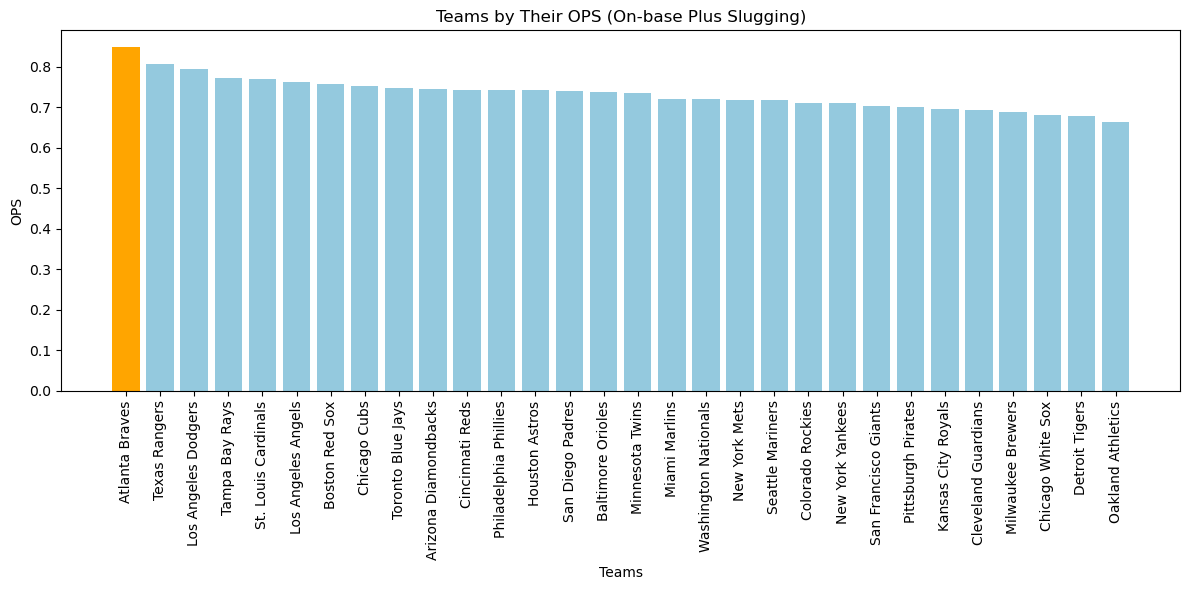

In [22]:
best_team_ops = team_batting_df.loc[team_batting_df['OPS'].idxmax()]

plt.figure(figsize=(12, 6))

# Bar plot to visualize the OPS of the teams
sns.barplot(x='TEAM', y='OPS', data=team_batting_df, color='skyblue')

# Highlighting the team with the best standings (highest OPS)
plt.bar(team_batting_df.index[team_batting_df['TEAM'] == 'Atlanta Braves'], best_team_ops['OPS'], color='orange')

# Adding labels and title
plt.xlabel('Teams')
plt.ylabel('OPS')
plt.title('Teams by Their OPS (On-base Plus Slugging)')
plt.xticks(rotation=90)
plt.tight_layout()

# Displaying the plot
plt.show()


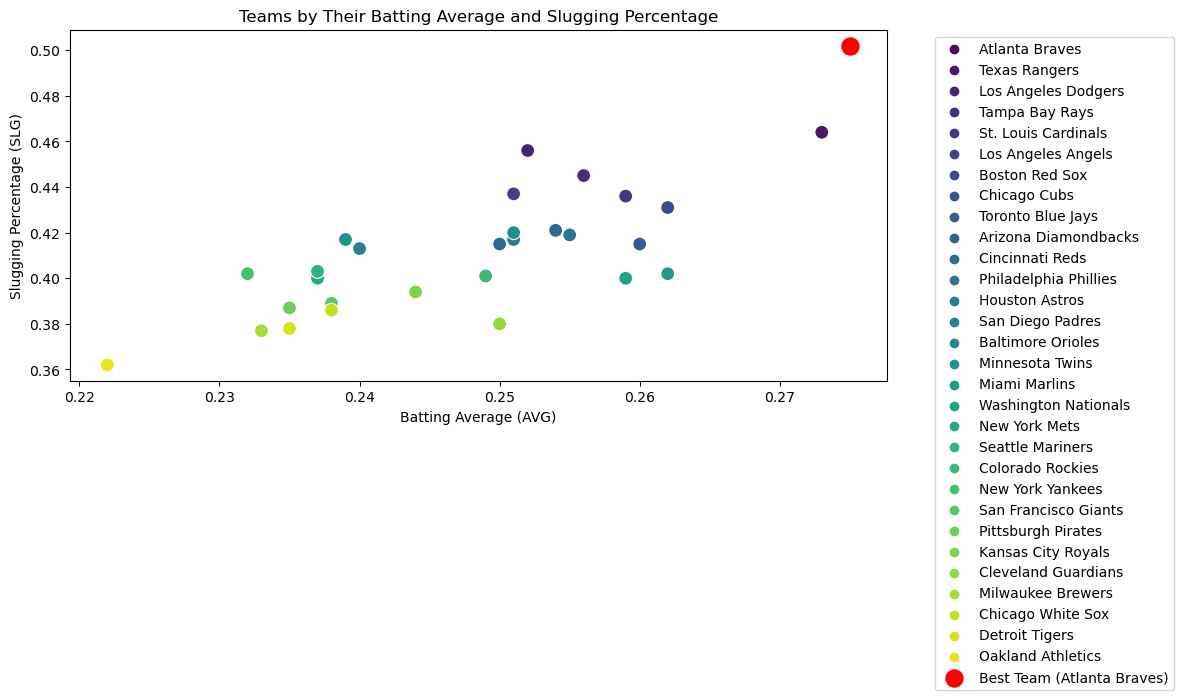

In [23]:
# Setting the plot size
plt.figure(figsize=(12, 6))

# Scatter plot to visualize teams by their AVG and SLG
sns.scatterplot(x='AVG', y='SLG', data=team_batting_df,
                hue='TEAM', s=100, palette='viridis')

# Highlighting the team with the best standings (highest OPS)
plt.scatter(best_team_ops['AVG'], best_team_ops['SLG'],
            color='red', s=150, label='Best Team (Atlanta Braves)')

# Adding labels and title
plt.xlabel('Batting Average (AVG)')
plt.ylabel('Slugging Percentage (SLG)')
plt.title('Teams by Their Batting Average and Slugging Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Displaying the plot
plt.show()
